In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('project_categorical.csv')

In [7]:
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']

In [8]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 101)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
estimators = [Ridge(random_state = 101),
              Lasso(random_state = 101),
              ElasticNet(random_state = 101)]

In [8]:
ridge_grid = {'alpha' : [0.1, 1, 10, 25, 35, 60, 80, 100]}

lasso_grid = {'alpha' : [0.1, 1, 10, 25, 35, 60, 80, 100]}

elasticnet_grid = {'alpha' : [0.1, 1, 10, 25, 35, 60, 80, 100],
                   'l1_ratio': np.linspace(0.1, 1, 15)}

param_grid = [ridge_grid,
              lasso_grid,
              elasticnet_grid]

In [9]:
cv_results = []
best_params = []
best_estimators = []

for i in range(len(estimators)):
    
    grid_search = GridSearchCV(
        estimator = estimators[i],
        param_grid = param_grid[i],
        scoring = 'neg_mean_squared_error',
        cv = 5,
        verbose = 1,
        n_jobs = -1
    )
    
    grid_search.fit(X_train_scaled, y_train)
    cv_results.append(grid_search.best_score_)
    best_params.append(grid_search.best_params_)
    best_estimators.append(grid_search.best_estimator_)
    print(cv_results[i]) 
    print(best_params[i])
    print(best_estimators[i])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


-527497909.49074423
{'alpha': 35}
Ridge(alpha=35, random_state=101)
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.6s finished


-521694737.93875456
{'alpha': 100}
Lasso(alpha=100, random_state=101)
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 585 out of 600 | elapsed:   16.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   16.8s finished


-521694737.93875456
{'alpha': 100, 'l1_ratio': 1.0}
ElasticNet(alpha=100, l1_ratio=1.0, random_state=101)


In [10]:
y_pred = grid_search.predict(X_test_scaled)

In [11]:
np.sqrt(mean_squared_error(y_test, y_pred))

23391.258203797574

In [12]:
np.mean(y)

180815.53743589742

In [13]:
residuals = y_test - y_pred

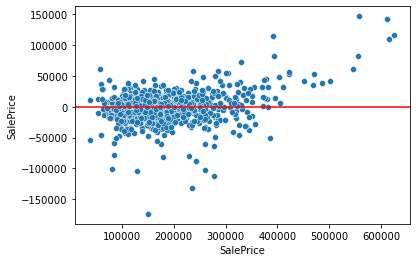

In [14]:
sns.scatterplot(x = y_test, y = residuals);
plt.axhline(color = 'red')

In [15]:
final_model = grid_search.fit(X, y)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.5min finished


In [16]:
y_hat = grid_search.predict(X)

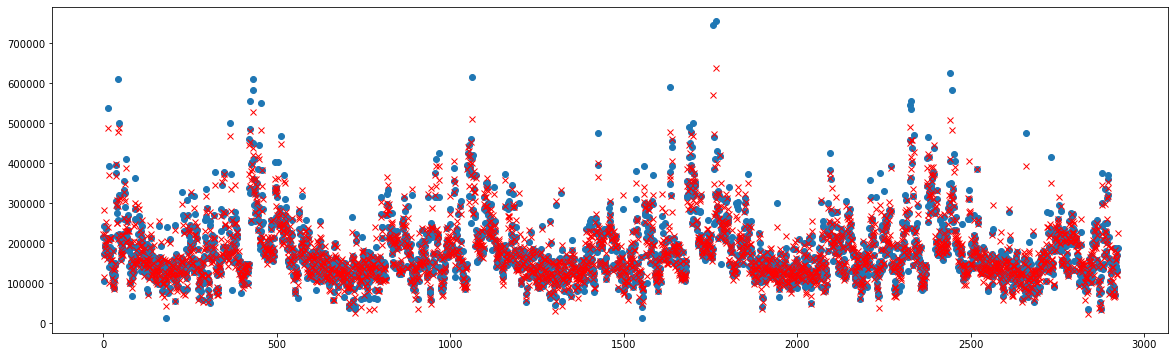

In [20]:
plt.figure(figsize = (20, 6))
plt.plot(y, 'o')
plt.plot(y_hat, 'x', color = 'red')

In [25]:
d = [y, y_hat]
pd.DataFrame(data = d).T

,SalePrice,Unnamed 0
0,215000.0,222672.630948
1,105000.0,115389.161215
2,172000.0,166880.295532
3,244000.0,282974.804524
4,189900.0,188633.668339
...,...,...
2920,142500.0,159678.074570
2921,131000.0,121620.670838
2922,132000.0,121013.036382
2923,170000.0,174447.550175


In [26]:
from joblib import dump, load
dump(final_model, 'grid_search_model.joblib')

['grid_search_model.joblib']

In [27]:
load_sales_model = load('grid_search_model.joblib')
load_sales_model

GridSearchCV(cv=5, estimator=ElasticNet(random_state=101), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 10, 25, 35, 60, 80, 100],
                         'l1_ratio': array([0.1       , 0.16428571, 0.22857143, 0.29285714, 0.35714286,
       0.42142857, 0.48571429, 0.55      , 0.61428571, 0.67857143,
       0.74285714, 0.80714286, 0.87142857, 0.93571429, 1.        ])},
             scoring='neg_mean_squared_error', verbose=1)